## Clustering with K-Means

### Understand the principle of this technique and scenarios

K-means is an unsupervised non-hierarchical clustering algorithm. It enables the observations of the data set to be grouped into K distinct clusters. Thus, similar data will be found in the same cluster. Moreover, an observation can only be found in one cluster at a time (exclusive membership). The same observation cannot therefore belong to two different clusters.


The fields of application of K-Means are numerous, it is used in particular in:

customer segmentation according to a certain criterion (demographic, purchasing habit, etc.)
Use of Data Mining clustering when mining data to find similar individuals. Usually, once these populations are detected, other techniques can be used as needed.
Document clustering (grouping documents according to their content. Think about how Google News groups documents by topic.)


### Experiment and evaluate an algorithm of this class of learning problem: K-means (or K-means) on a simple data set.

In [41]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import sklearn
import matplotlib.pyplot as plt
import nltk

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [3]:
digits = load_digits()

data = scale(digits.data)
y = digits.target

# Set k 
k = 10

samples, features = data.shape

# Define model
model = KMeans(n_clusters=k, init="k-means++", n_init=10)

In [4]:
# Score fonction
def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

In [5]:
bench_k_means(model, "result", data)

result   	69417	0.602	0.649	0.625	0.466	0.621	0.147


In [6]:
# PCA Transformation
pca = PCA(2)
datatr = pca.fit_transform(data)

model2 = model.fit_predict(datatr)

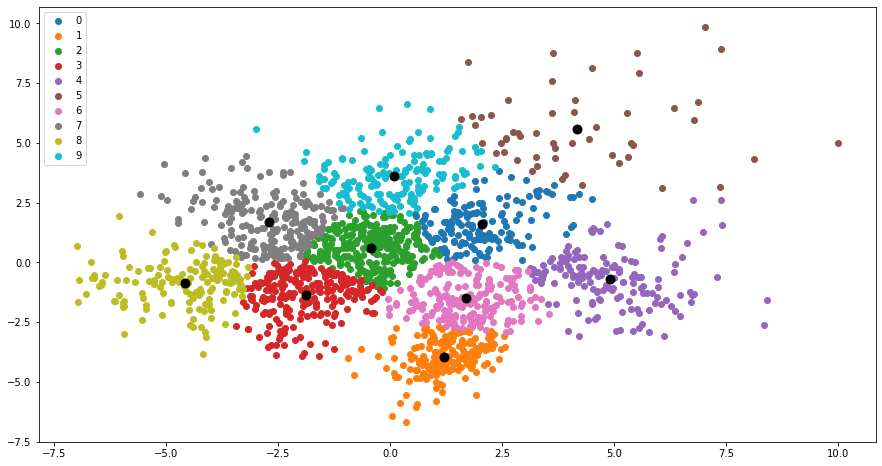

In [7]:
centroids = model.cluster_centers_

unique_labels = np.unique(model2)
 
# Plot result

fig = plt.figure(1, figsize=(15, 8))

for i in unique_labels:
    plt.scatter(datatr[model2 == i , 0] , datatr[model2 == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

### Complexite

Complixite of clustering is O(N2)

### Understand and compare in-game evaluation metrics test on previously used classification games the ability of the algorithm to find the prediction categories.

#### Homogeneity, completeness and V-measure

Given the knowledge of the ground truth class assignments of the samples, it is possible to define some intuitive metric using conditional entropy analysis.

__homogeneity:__ each cluster contains only members of a single class.

__completeness:__ all members of a given class are assigned to the same cluster.

We can turn those concept as scores homogeneity_score and completeness_score. Both are bounded below by 0.0 and above by 1.0 (higher is better):

Their harmonic mean called V-measure is computed by 

__v_measure_score:__

beta defaults to a value of 1.0, but for using a value less than 1 for beta:

>>>metrics.v_measure_score(labels_true, labels_pred, beta=0.6)
0.54...

more weight will be attributed to homogeneity, and using a value greater than 1:

>>>metrics.v_measure_score(labels_true, labels_pred, beta=1.8)
0.48...

more weight will be attributed to completeness.
The V-measure is actually equivalent to the mutual information (NMI) discussed above, with the aggregation function being the arithmetic mean
Homogeneity, completeness and V-measure can be computed at once using __homogeneity_completeness_v_measure__

#### Adjusted_rand_score, rand_score

Rand index is a function that measures the similarity of the two assignments
Furthermore, both __rand_score__ __adjusted_rand_score__ are symmetric: swapping the argument does not change the scores.

#### Sillhouette_score

The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

#### Adjusted_mututal_information , Normalized_mutual_information

Adjusted Mutual Information (AMI). NMI is often used in the literature, while AMI was proposed more recently and is normalized against chance:
The Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations

### Using clustering on emotion wheel data

In [33]:
df = pd.read_csv("data/emotion_final.csv")
stopwords = nltk.corpus.stopwords.words('english')

In [63]:
x = df["Text"]
y = df["Emotion"]

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english')
tf_idf = tf_idf_vectorizor.fit_transform(x)

c_vectorizor = CountVectorizer(stop_words = 'english')
countv = c_vectorizor.fit_transform(x)


In [64]:
k2 = 6

modelt = KMeans(n_clusters=k2, n_init=10, random_state=0)

In [70]:
# Truncated for use pca on text data

clf = TruncatedSVD(100)
Xpca = clf.fit_transform(tf_idf_norm)
Xpca2 = clf.fit_transform(countv)

pca = PCA(2)
datatr2 = pca.fit_transform(Xpca)
datatr3 = pca.fit_transform(Xpca2)


modelt2 = modelt.fit_predict(datatr2)

In [67]:
print(99*"_")
print('init\t\tinertia\thomo\tcompl\tv-meas\tARS\tAMI\tsilhouette\n')

bench_k_means(modelt, "Kmeans", tf_idf_norm)
bench_k_means(modelt, 'KmeansPCA', datatr2)
bench_k_means(KMeans(n_clusters=k2, init="k-means++", random_state=0), 'idf-Kmeans++', tf_idf_norm)
bench_k_means(KMeans(n_clusters=k2, init="k-means++", random_state=0), 'idf-Kmeans++PCA', datatr2)
bench_k_means(KMeans(n_clusters=k2, init="random", random_state=0), "idf-Random", tf_idf_norm)
bench_k_means(KMeans(n_clusters=k2, init="random", random_state=0), "idf-RandomPCA", datatr2)
bench_k_means(KMeans(n_clusters=k2, init="k-means++", random_state=0), 'count-Kmeans++', countv)
bench_k_means(KMeans(n_clusters=k2, init="k-means++", random_state=0), 'count-Kmeans++P', datatr3)


___________________________________________________________________________________________________
init		inertia	homo	compl	v-meas	ARS	AMI	silhouette

Kmeans   	20855	0.002	0.002	0.002	0.002	0.002	0.005
KmeansPCA	52	0.002	0.003	0.002	0.001	0.002	0.552
idf-Kmeans++	20855	0.002	0.002	0.002	0.002	0.002	0.005
idf-Kmeans++PCA	52	0.002	0.003	0.002	0.001	0.002	0.552
idf-Random	20853	0.002	0.002	0.002	0.002	0.002	0.005
idf-RandomPCA	52	0.002	0.003	0.002	0.000	0.002	0.551
count-Kmeans++	163931	0.007	0.008	0.007	0.006	0.007	0.046
count-Kmeans++P	1198	0.008	0.008	0.008	0.012	0.008	0.784


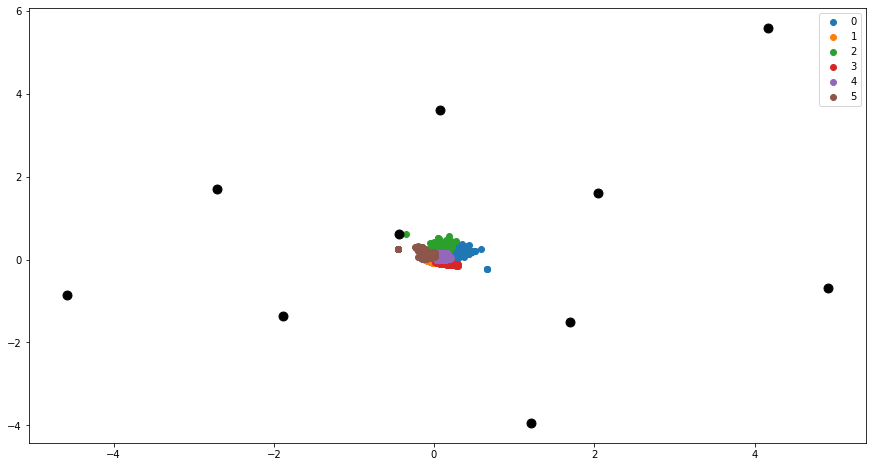

In [71]:
centroids2 = modelt.cluster_centers_

unique_labels2 = np.unique(modelt2)

fig = plt.figure(1, figsize=(15, 8))

for i in unique_labels2:
    plt.scatter(datatr2[modelt2 == i , 0] , datatr2[modelt2 == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()